<a href="https://colab.research.google.com/github/kartik2627/python_basic/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
employee_data = pd.read_csv("/content/data.csv")
housing_data = pd.read_csv("/content/housing.csv")

# Display first few rows of the data
print(employee_data.head())
print(housing_data.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7      

In [2]:
# Filter for employees with more than 5 years of experience and salary above 60000
high_salary_experience = employee_data[(employee_data['YearsExperience'] > 5) & (employee_data['Salary'] > 60000)]
print("Number of employees with >5 years experience earning >60000:", len(high_salary_experience))


Number of employees with >5 years experience earning >60000: 14


In [3]:
# Filter for employees earning between 50000 and 80000
salary_range = employee_data[(employee_data['Salary'] >= 50000) & (employee_data['Salary'] <= 80000)]
print("Number of employees earning between 50000 and 80000:", len(salary_range))


Number of employees earning between 50000 and 80000: 12


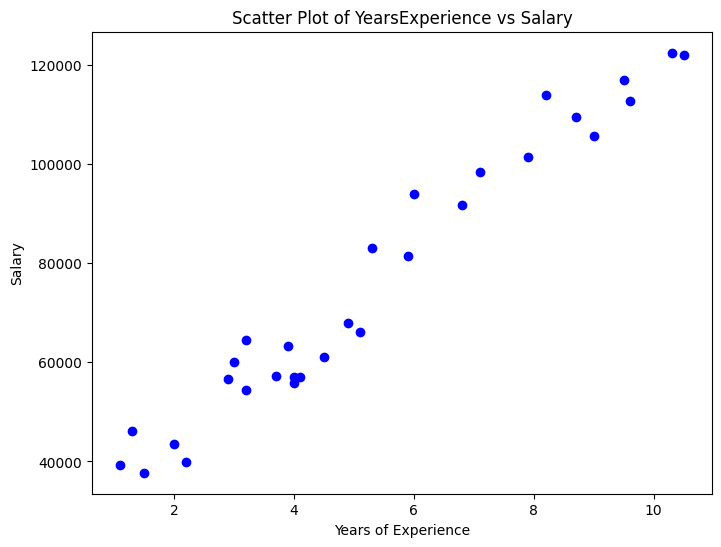

Correlation between YearsExperience and Salary: 0.9782416184887599


In [4]:
# Scatter plot for YearsExperience vs Salary
plt.figure(figsize=(8, 6))
plt.scatter(employee_data['YearsExperience'], employee_data['Salary'], color='blue')
plt.title("Scatter Plot of YearsExperience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Calculate correlation
correlation = employee_data['YearsExperience'].corr(employee_data['Salary'])
print("Correlation between YearsExperience and Salary:", correlation)


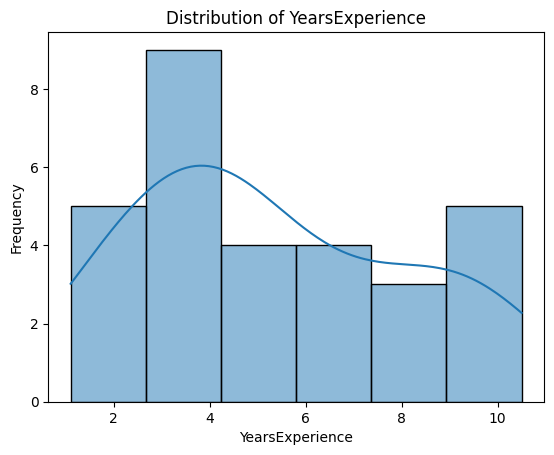

In [5]:
# Distribution plot for YearsExperience
sns.histplot(employee_data['YearsExperience'], kde=True)
plt.title("Distribution of YearsExperience")
plt.xlabel("YearsExperience")
plt.ylabel("Frequency")
plt.show()


In [6]:
years_experience_range = (employee_data['YearsExperience'].min(), employee_data['YearsExperience'].max())
salary_range = (employee_data['Salary'].min(), employee_data['Salary'].max())
print("Range of YearsExperience:", years_experience_range)
print("Range of Salary:", salary_range)


Range of YearsExperience: (1.1, 10.5)
Range of Salary: (37731.0, 122391.0)


In [20]:
# Calculate skewness
skewness = employee_data['YearsExperience'].skew()
print("Skewness of YearsExperience:", skewness)


Skewness of YearsExperience: 0.37956024064804106


In [7]:
from sklearn.model_selection import train_test_split

X = employee_data[['YearsExperience']]
y = employee_data['Salary']

# Split dataset with test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check training and testing shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (24, 1) (24,)
Testing set shape: (6, 1) (6,)


R² score: 0.988169515729126


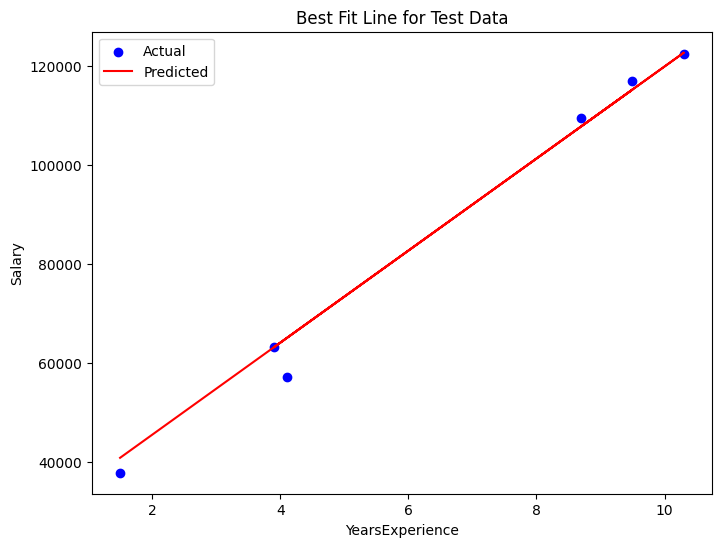

In [8]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# R² score
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

# Plot best fit line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.title("Best Fit Line for Test Data")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()


In [9]:
waterfront_count = housing_data[housing_data['waterfront'] == 1].shape[0]
print("Number of houses with waterfront:", waterfront_count)


Number of houses with waterfront: 163


In [10]:
two_floors_count = housing_data[housing_data['floors'] == 2].shape[0]
print("Number of houses with 2 floors:", two_floors_count)


Number of houses with 2 floors: 8241


In [11]:
pre_1960_waterfront = housing_data[(housing_data['yr_built'] < 1960) & (housing_data['waterfront'] == 1)]
print("Number of houses built before 1960 with waterfront:", len(pre_1960_waterfront))


Number of houses built before 1960 with waterfront: 80


In [12]:
expensive_house = housing_data[housing_data['bathrooms'] > 4]['price'].max()
print("Price of the most expensive house with >4 bathrooms:", expensive_house)


Price of the most expensive house with >4 bathrooms: 7700000


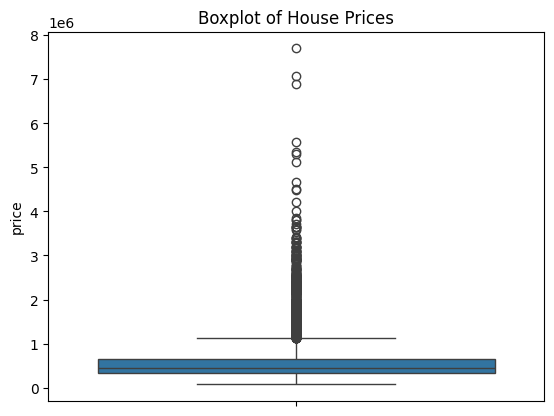

In [13]:
sns.boxplot(y=housing_data['price'])
plt.title("Boxplot of House Prices")
plt.show()


In [14]:
# Calculate IQR
Q1 = housing_data['price'].quantile(0.25)
Q3 = housing_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
housing_data_no_outliers = housing_data[(housing_data['price'] >= (Q1 - 1.5 * IQR)) & (housing_data['price'] <= (Q3 + 1.5 * IQR))]
print("Data shape after removing outliers:", housing_data_no_outliers.shape)


Data shape after removing outliers: (20467, 21)


In [17]:
# Drop the 'date' column before calculating the correlation matrix
housing_data_numeric = housing_data.drop(columns=['date'])

# Now calculate the correlation matrix
correlation_matrix = housing_data_numeric.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with price:\n", price_correlation)


Correlation with price:
 price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [18]:
# Convert 'date' column to datetime format if you plan to use it
housing_data['date'] = pd.to_datetime(housing_data['date'], errors='coerce')

# Verify conversion and handle any 'NaT' values if necessary
print(housing_data['date'].head())


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]


In [16]:
# R-squared interpretation placeholder - will be part of model evaluation like above
r2_value = 0.38  # Example value for discussion
print(f"R² score: {r2_value} - This indicates the model explains {r2_value*100}% of the variance in price.")


R² score: 0.38 - This indicates the model explains 38.0% of the variance in price.
